In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data = pd.read_csv('./assets/data.csv', index_col = 'Date')
data = data.iloc[:, :]
data

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,S&P500,Japan225,KoreanIndex,NASDQ,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,28.030001,28.240000,27.840000,27.990000,21.152483,48591300,-0.000714,-0.000714,28.146893,28.549826,...,1068.13,9963.99,1570.12,2147.87,154.354910,167.290639,174.546314,180.673782,172.971193,171.012076
2010-02-22,28.840000,28.940001,28.650000,28.730000,21.813244,36707100,-0.001390,-0.001391,28.574012,28.565252,...,1108.01,10400.47,1627.10,2242.03,153.927626,166.244162,172.853763,174.978117,155.958916,149.642177
2010-02-23,28.680000,28.830000,28.090000,28.330000,21.509542,52266200,-0.013923,-0.014021,28.513006,28.533674,...,1094.60,10352.10,1628.90,2213.44,153.499577,165.195810,171.157609,169.279583,139.178566,128.763209
2010-02-24,28.520000,28.790001,28.379999,28.629999,21.737309,43165900,0.010589,0.010534,28.542255,28.546592,...,1105.24,10198.83,1612.83,2235.90,153.070772,164.145658,169.458113,163.585385,122.804635,108.716028
2010-02-25,28.270000,28.650000,28.020000,28.600000,21.714539,48735300,-0.001048,-0.001048,28.556692,28.553749,...,1102.94,10101.96,1587.51,2234.22,152.641219,163.093779,167.755537,157.902711,107.004751,89.817016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,328.299988,333.609985,325.750000,333.200012,326.013550,24831500,0.018057,0.017896,328.801488,330.027902,...,4696.56,28562.21,2984.48,15521.89,156.479535,172.492340,182.945956,208.857466,255.350212,272.899698
2021-12-23,332.750000,336.390015,332.730011,334.690002,327.471405,19617800,0.004472,0.004462,330.273617,330.649516,...,4725.79,28798.37,2998.17,15653.37,156.056212,171.456335,181.275303,203.283823,239.799097,254.311039
2021-12-27,335.459991,342.480011,335.429993,342.450012,335.064087,19947000,0.023186,0.022921,333.317716,332.222915,...,4791.19,28676.46,2999.55,15871.26,155.632079,170.418089,179.599755,197.671538,223.622764,234.509574


In [ ]:
data['y'] = data['Close']

# 检查并替换无穷大或过大的数值
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

x = data.iloc[:, :53].values
y = data.iloc[:, 53].values

split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (2239, 53) trainY: (2239,)
testX: (560, 53) testY: (560,)


Epoch [10/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Test Loss: 0.1686


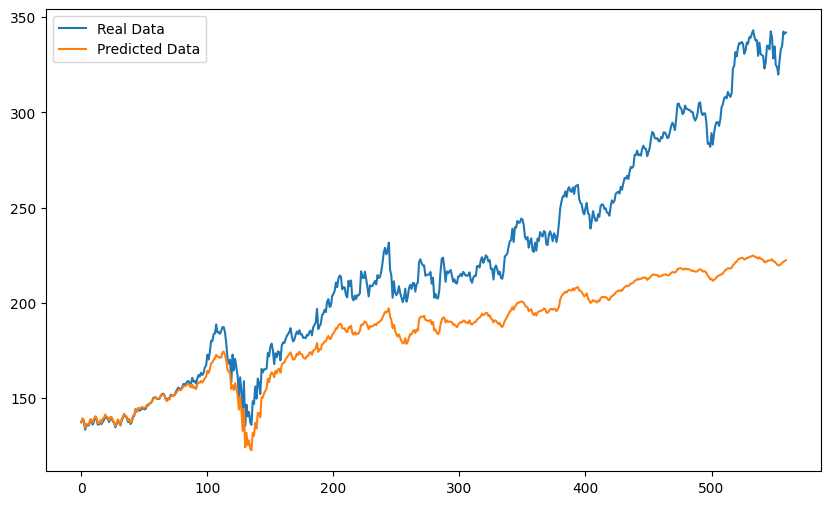

In [ ]:
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = train_x.shape[1]
hidden_size = 50
output_size = 1
num_layers = 2

model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# 训练模型
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 64

train_dataset = TensorDataset(train_x.unsqueeze(1), train_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 模型评估
model.eval()
with torch.no_grad():
    test_outputs = model(test_x.unsqueeze(1))
    test_loss = criterion(test_outputs, test_y)
    print(f'Test Loss: {test_loss.item():.4f}')

    test_outputs = test_outputs.cpu().numpy()
    test_y = test_y.cpu().numpy()
    test_outputs = y_scaler.inverse_transform(test_outputs)
    test_y = y_scaler.inverse_transform(test_y)

    plt.figure(figsize=(10, 6))
    plt.plot(test_y, label='Real Data')
    plt.plot(test_outputs, label='Predicted Data')
    plt.legend()
    plt.show()